###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license. (c)2014 Lorena A. Barba, Olivier Mesnard. Thanks: NSF for support via CAREER award #1149784.

# Infinite row of vortices

In [6]:
#Erik 4/6/24
#imports
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

The objective of this assignment is to visualize the streamlines around an infinite row of vortices. First, you will consider the case of a finite number of vortices, obtained by simple superposition. By adding more and more vortices, you should be able to see how the flow pattern approaches that of an infinite row of vortices. But there will always be some differences (pay attention to what these may be).

It's possible to derive an analytical expression for the infinite case, and the derivation is provided below. With this analytical expression, you can visualize the streamlines for the infinite case. Observe and think: how are the streamlines different from one case to the other?


In this notebook, there is no Python code. Your job is to study the theory (and follow the mathematics on your own handwritten notes), to think how you could implement it in an efficient manner and finally to code it and visualize the results.

## Vortex flow (from previous lesson)

You might not suspect it, but the vortex has a very important role in classical aerodynamic theory. You'll discover some of its uses in this assignment.

First, a little review of the basics. As seen in a previous lesson, a vortex of strength $\Gamma$ has a stream-function:

$$\psi\left(r,\theta\right) = \frac{\Gamma}{2\pi}\ln r$$

and a velocity potential

$$\phi\left(r,\theta\right) = -\frac{\Gamma}{2\pi}\theta$$

We can now derive the velocity components in a polar coordinate system, as follows:

$$u_r\left(r,\theta\right) = 0$$

$$u_\theta\left(r,\theta\right) = -\frac{\Gamma}{2\pi r}$$

In a Cartesian coordinate system, the velocity components at $\left(x,y\right)$ around a vortex of strength $\Gamma$ located at $\left(x_\text{vortex},y_\text{vortex}\right)$, are given by

$$u\left(x,y\right) = +\frac{\Gamma}{2\pi}\frac{y-y_\text{vortex}}{(x-x_\text{vortex})^2+(y-y_\text{vortex})^2}$$

$$v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x-x_\text{vortex}}{(x-x_\text{vortex})^2+(y-y_\text{vortex})^2}$$

and the stream-function is written as

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left((x-x_\text{vortex})^2+(y-y_\text{vortex})^2\right)$$

In [7]:
N = 50 #number of nodes on each axis
x_start, x_end = -2.0, 2.0 #unit start and end lengths
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N) #creates evenly spaced digits
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y) #creates grid from evenly spaced digits

def get_velocity_vortex(strength, x_coord, y_coord, X, Y):
  #strength is strength of vortex, also known as gamma
  #x_coord and y_coord is the x coordinate of the vortex
  #X and Y are the grid coordinates
  u = ((+strength * (Y - y_coord)) / (2 * math.pi * (X - x_coord)**2 + (Y - y_coord)**2))
  v = ((-strength * (X - x_coord)) / (2 * math.pi * (X - x_coord)**2 + (Y - y_coord)**2))
  # negative strength times (X - x_coord) / 2pi * (X - x_coord)^2 + (y - y_coord)^2

  #returns two 2D arrays, one of the x velocity and one of the y velocity of each vector at each point
  return u, v

def get_stream_function_vortex(strength, x_coord, y_coord, X, Y):

  #strength is strength of vortex, also known as gamma
  #x_coord and y_coord is the x coordinate of the vortex
  #X and Y are the grid coordinates
  psi = (strength * numpy.log((X - x_coord)**2 + (Y - y_coord)**2)) / (math.pi * 4)
  #(strength times numpy.log((X - x_coord)**2 + (Y - y_coord)**2)) / (math.pi * 4)

  #returns the 2D array of floats known as the stream function
  return psi

## Superposition of many vortices

In this assignment, we consider a useful example to illustrate the concept of a *vortex sheet*: an infinite row of vortices of equal strength $\Gamma$ (same sign and magnitude) evenly spaced by a distance $a$. But let's start with a finite row of vortices first.


The stream-function $\psi_i$ of the $i^{th}$ vortex at a distance $r_i$ is given by:

$$\psi_i = \frac{\Gamma}{2\pi}\ln r_i$$

Applying the principle of superposition, the stream-function of $N$ vortices is, then

$$\psi = \frac{\Gamma}{2\pi} \sum_{i=1}^N \ln r_i$$

And the velocity field (in Cartesian coordinates) of the row of vortices is

$$u\left(x,y\right) = + \frac{\Gamma}{2\pi} \sum_{i=1}^N \frac{y-y_i}{(x-x_i)^2+(y-y_i)^2}$$

$$v\left(x,y\right) = - \frac{\Gamma}{2\pi} \sum_{i=1}^N \frac{x-x_i}{(x-x_i)^2+(y-y_i)^2}$$

where $\left(x_i,y_i\right)$ are the Cartesian coordinates of the $i^{\text{th}}$ vortex.

Here is a diagram of the situation:

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/infiniteRowVorticesSketch.png?raw=1"></center>

(In the next section, we'll show you how to derive a closed-form expression for the *infinite* sum of vortices. But hang on.)

---

In [8]:
def get_velocity_n_vortices(strength, x_coords, y_coords, X, Y, num_vortex):
  #get r from x_coords and y_coords
  #compute all velocities
  #use superposition to add them all into final velocity matrix
  #

  #strength is strength of vorticies
  #x_coords and y_coords are the x and y coordinates of the vortices respectively
  #X and Y are the entire mesh grid
  #for all vorticies, calculate velocity function at that point
  u_final = numpy.zeros_like(X)
  v_final = numpy.zeros_like(Y)

  for i in range(num_vortex):
    x_vortex = x_coords.flat[i]
    y_vortex = y_coords.flat[i]
    u_vortex, v_vortex = get_velocity_vortex(strength, x_vortex, y_vortex, X, Y)
    u_final = u_final + u_vortex
    v_final = v_final + v_vortex

  return u_final, v_final

def get_stream_function_vorticies(strength, x_coords, y_coords, X, Y, num_vortex):
  psi_final = numpy.zeros_like(X)
  for i in range(num_vortex):
    psi_final = psi_final + get_stream_function_vortex(strength, x_coords.flat[i], y_coords.flat[i], X, Y)
  return psi_final

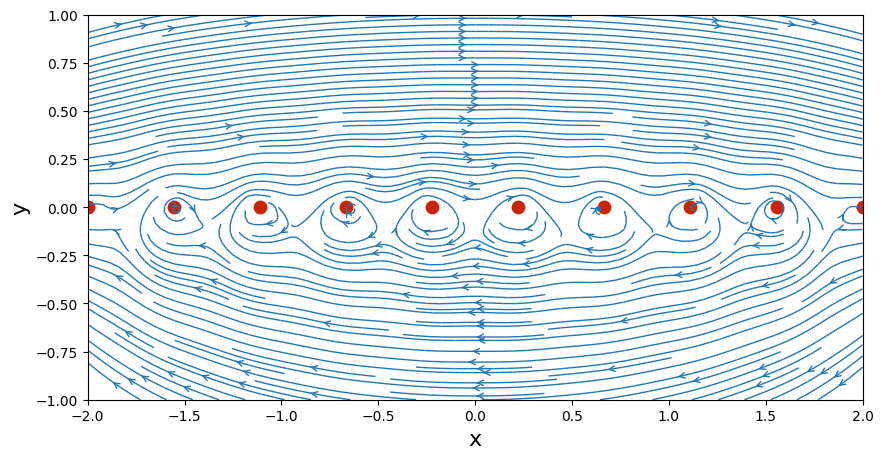

In [9]:
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float) #assign all x velocities to 1
v_freestream = numpy.zeros((N, N), dtype=float) #assign all y velocities to 0

num_vortex = 10
strength = 1;
x_vstart, x_vend = -2.0, 2.0
x_vorticies = numpy.linspace(x_vstart, x_vend, num_vortex)
xv, yv = numpy.meshgrid(x_vorticies, 0) # evenly spaced grid of num_vortex vorticies

u_vortex, v_vortex = get_velocity_n_vortices(strength, xv, yv, X, Y, num_vortex) #we now have our final velocities
psi = get_stream_function_vorticies(strength, xv, yv, X, Y, num_vortex) #we now have stream function

u_f1 = u_vortex + u_freestream
v_f1 = v_vortex + v_freestream

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_f1, v_f1, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
for i in range(num_vortex):
  x_vortex = x_vorticies.flat[i]
  y_vortex = 0
  pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

##### Task:

#### Compute the velocity field and plot the streamlines of a row of vortices.

You will place $N$ vortices aligned on the horizontal axis and visualize the flow pattern. Do the following:

* Using the equations derived above, compute the velocity components of each vortex on a mesh grid.

* Remember that a finite number of vortices can be represented by a *list* or a NumPy *array*. Think and decide which one to use.

* Define functions to avoid code repetition  (and why not classes, if you prefer and are familiar with the concept).

* Once you have all the velocities, apply the principle of superposition and plot the resulting flow pattern.

* Play around with the size of your vortex row and the plotting range. Make your plot of publishable quality!

In the end you should get something similar to this:

<center><img src="https://github.com/barbagroup/AeroPython/blob/master/lessons/resources/infiniteRowVortices.png?raw=1"></center>

---

## Infinite row of vortices

This will be a fun mathematical exercise! Follow along, and take your own notes.

To derive the closed-form functions, we use the complex representation:

$$z = x + jy$$

where $j^2=-1$. (We don't use $i$ to not confuse it with our indices!)

The complex potential is defined as $w = \phi + j\psi$, where $\phi$ is the potential velocity and $\psi$ is the stream-function. If we differentiate the complex potential $w$ with respect to the complex variable $z$, we get the complex velocity

$$\frac{dw}{dz} = u-jv$$

where $u$ and $v$ are the Cartesian velocity components.

The complex potential representing a vortex of strength $\Gamma$ located at the origin is

$$w = \frac{j\Gamma}{2\pi}\ln z$$

Why?

Because $z=re^{j\theta}$ and $w$ becomes

$$w = -\frac{\Gamma}{2\pi}\theta + j\frac{\Gamma}{2\pi}\ln r = \phi + j\psi$$

Consider a second vortex located at $\left(a,0\right)$ with the same strength $\Gamma$. Its complex potential is given by

$$w = \frac{j\Gamma}{2\pi}\ln \left(z-a\right)$$

A additional vortex located $a$ further will have a complex potential of the form

$$w = \frac{j\Gamma}{2\pi}\ln \left(z-2a\right)$$

and so on...

Therefore, the complex potential representing an infinite row of vortices (on the line $y=0$) is given by

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty} \ln \left( z-ma \right)$$

When we integrate the velocity components, in the previous notebooks, to find the stream-function and the potential, we dropped the constant of integration. Here, we decide to add a constant (not a random one!). Why not, since the differentiation will give the same results.

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty}^{+\infty} \ln \left( z-ma \right) + \text{constant}$$

where

$$\text{constant} = -\frac{j\Gamma}{2\pi} \sum_{m=-\infty, m\neq 0}^{+\infty} \ln \left( -ma \right)$$

so that, the complex potential can be cast in the following form

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( \frac{z-ma}{-ma} \right) + \frac{j\Gamma}{2\pi}\ln z$$

Now, it is time do some mathematics...

$$w = \frac{j\Gamma}{2\pi}\sum_{m=-\infty,m\neq 0}^{+\infty} \ln \left( 1-\frac{z}{ma} \right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \left\lbrace \ln\left(1-\frac{z}{ma}\right) + \ln\left(1+\frac{z}{ma}\right) \right\rbrace + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi}\sum_{m=1}^{+\infty} \ln\left(1-\frac{z^2}{m^2a^2}\right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(\prod_{m=1}^{+\infty}\left(1-\frac{z^2}{m^2a^2}\right)\right) + \frac{j\Gamma}{2\pi}\ln z$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{z^2}{m^2a^2}\right)\right)$$

$$w = \frac{j\Gamma}{2\pi} \ln\left(z\prod_{m=1}^{+\infty}\left(1-\frac{\left(\frac{z\pi}{a}\right)^2}{m^2\pi^2}\right)\right)$$

The product is actually the formula for the sine and the complex potential becomes

$$w = \frac{j\Gamma}{2\pi}\ln\left(\sin\left(\frac{z\pi}{a}\right)\right)$$

We derive the complex potential with respect to the complex variable to get the complex velocity

$$\frac{dw}{dz} = u-iv = \frac{j\Gamma}{2a}\cot\left(\frac{z\pi}{a}\right)$$

$$u-jv = \frac{j\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}+j\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}+j\frac{\pi y}{a}\right)}$$

Applying trigonometric identities, we find the following expression

$$u-jv = \frac{j\Gamma}{2a}\frac{\cos\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right) - j\sin\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}{\sin\left(\frac{\pi x}{a}\right)\cosh\left(\frac{\pi y}{a}\right) + j\cos\left(\frac{\pi x}{a}\right)\sinh\left(\frac{\pi y}{a}\right)}$$

which can be cast in the form (try it!)

$$u-jv = \frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right) - \cos\left(\frac{2\pi x}{a}\right)} + j \frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right) - \cos\left(\frac{2\pi x}{a}\right)}$$

Therefore, the Cartesian velocity components of an infinite row of vortices are given by

$$u\left(x,y\right) = +\frac{\Gamma}{2a}\frac{\sinh\left(\frac{2\pi y}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

$$v\left(x,y\right) = -\frac{\Gamma}{2a}\frac{\sin\left(\frac{2\pi x}{a}\right)}{\cosh\left(\frac{2\pi y}{a}\right)-\cos\left(\frac{2\pi x}{a}\right)}$$

---

In [10]:
def get_velocity_infvortex(strength, xcoord, ycoord, X, Y, gap):
  #strength is strength of field
  #xcoord is coordinate of horizontal line of vorticies, should be 0?
  #y coord is y coordinate of line of vorticies
  #X and Y are the grid
  #gap is the distance between vortices - should be 0?

  # what is a?? - gap between the variables
  #u = strength / 2 * gap *
  u = (strength / (2 * gap)) * (numpy.sinh(math.pi * 2 * Y / gap)) / ((numpy.cosh(2 * math.pi * Y / gap ))  - numpy.cos(2 * math.pi * X / gap))
  v = (-strength / (2 * gap)) * (numpy.sin(math.pi * 2 * X / gap)) / ((numpy.cosh(2 * math.pi * Y / gap ))  - numpy.cos(2 * math.pi * X / gap))
  #ERROR DOES NOT HAVE THE SAME SHAPE AS THE OTHER GRID when using xcoord and ycoord
  return u, v

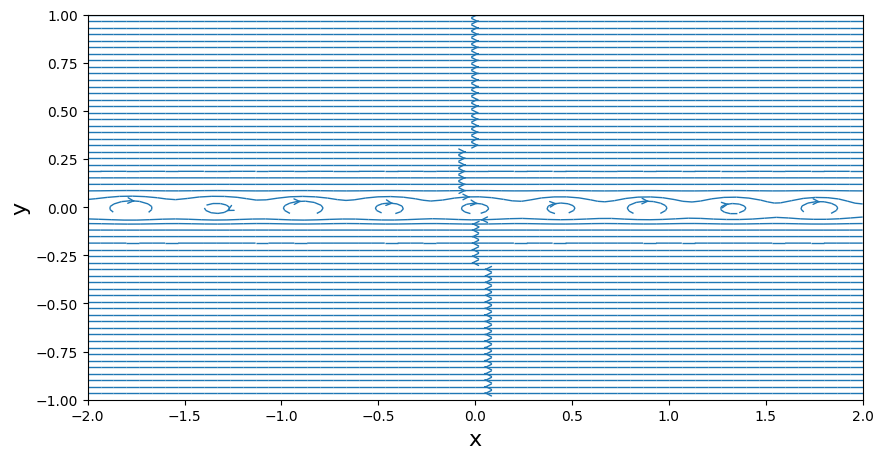

In [16]:
num_vortex = 10
strength = 1
xcoord = 0
ycoord = 0
u_iv, v_iv = get_velocity_infvortex(strength, xcoord, ycoord, X, Y, 0.1)
psi = get_stream_function_vorticies(strength, xv, yv, X, Y, num_vortex) #we now have stream function

u_f = u_iv + u_freestream
v_f = v_iv + v_freestream

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_f, v_f, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

##### Task:

#### Compute the velocity field and plot the streamlines of an *infinite* row of vortices

Now that we have derived the functions for the velocity components, implement them in a code cell and plot the streamlines.

*Can you notice the differences with the previous case where the number of vortices was finite?*

Play around with your plotting settings for the *finite* row of vortices, until you can get a plot that looks more like the infinite case. When can you say the finite case is a good approximation of the infinite case?

##### Think

Notice that the streamline pattern is parallel to the *vortex sheet*: there is no net normal flow. Therefore, the sheet can model a solid surface in potential flow. We end up with a slip velocity at such an interface: how is this consistent with potential flow?

---

In [12]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')

FileNotFoundError: [Errno 2] No such file or directory: '../styles/custom.css'